In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts
pd.set_option('display.max_columns',500)

pd.set_option('display.max_rows', 80)

pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests

In [2]:
data=pd.read_excel("Dataset.xlsx").replace(['-','#N/A'], np.nan)
data_raw=data
print("Dataset Shape: {}".format(data.shape))
data.head()

Dataset Shape: (590, 82)


,X,State,District,Persons,Males,Females,Growth..1991...2001.,Rural,Urban,Scheduled.Caste.population,Percentage...SC.to.total,Number.of.households,Household.size..per.household.,Sex.ratio..females.per.1000.males.,Sex.ratio..0.6.years.,Scheduled.Tribe.population,Percentage.to.total.population..ST.,Persons..literate,Males..Literate,Females..Literate,Persons..literacy.rate,Males..Literatacy.Rate,Females..Literacy.Rate,Total.Educated,Data.without.level,Below.Primary,Primary,Middle,Matric.Higher.Secondary.Diploma,Graduate.and.Above,X0...4.years,X5...14.years,X15...59.years,X60.years.and.above..Incl..A.N.S..,Total.workers,Main.workers,Marginal.workers,Non.workers,SC.1.Name,SC.1.Population,SC.2.Name,SC.2.Population,SC.3.Name,SC.3.Population,Religeon.1.Name,Religeon.1.Population,Religeon.2.Name,Religeon.2.Population,Religeon.3.Name,Religeon.3.Population,ST.1.Name,ST.1.Population,ST.2.Name,ST.2.Population,ST.3.Name,ST.3.Population,Imp.Town.1.Name,Imp.Town.1.Population,Imp.Town.2.Name,Imp.Town.2.Population,Imp.Town.3.Name,Imp.Town.3.Population,Total.Inhabited.Villages,Drinking.water.facilities,Safe.Drinking.water,Electricity..Power.Supply.,Electricity..domestic.,Electricity..Agriculture.,Primary.school,Middle.schools,Secondary.Sr.Secondary.schools,College,Medical.facility,Primary.Health.Centre,Primary.Health.Sub.Centre,Post..telegraph.and.telephone.facility,Bus.services,Paved.approach.road,Mud.approach.road,Permanent.House,Semi.permanent.House,Temporary.House
0,1,AN,"District Andamans (01), Andaman & Nicobar Isla...",314084,170319,143765,30.14,197886,116198,NaN,NaN,70167.000,4.000,844.000,959.000,2904,0.92,226600,131223,95377,82.490,87.360,76.620,226600.000,1623.000,48339.000,62233.000,49731.000,50748.000,13909.000,27505.000,64496.000,204928.000,17155.000,116631,100683,15948,197453,No Scheduled Castes in this area,nan,NaN,nan,NaN,nan,1.Hindus,235862,2.Christians,49033,3.Muslims,27134,1.Nicobarese,2486,2.Jarawas,240,3.Onges,96,1.Port Blair (M Cl),99984.000,2.Garacharma (CT),9427.000,3.Bambooflat (CT),6787.000,331.000,331.000,293.000,233.000,148,16,185.000,83,71,1,102,16,78,161.000,187,201,243,28.700,39.100,32.000
1,2,AN,"District Nicobars (02), Andaman & Nicobar Isla...",42068,22653,19415,7.19,42068,NaN,NaN,NaN,8075.000,5.000,857.000,936.000,26565,63.15,26535,15608,10927,72.350,78.550,65.010,26535.000,346.000,5062.000,8544.000,6439.000,5150.000,994.000,3736.000,8307.000,27535.000,2490.000,19623,12924,6699,22445,No Scheduled Castes in this area,nan,NaN,nan,NaN,nan,1.Christians,28145,2.Hindus,10727,3.Muslims,2131,1.Nicobarese,26167,2.Shom Pens,398,3.All Scheduled Tribes,26565,No Urban Area,nan,NaN,nan,NaN,nan,170.000,169.000,163.000,96.000,93,NaN,53.000,25,22,NaN,38,4,31,36.000,49,51,111,28.000,33.300,38.700
2,3,Andhra,"District Adilabad (01), Andhra Pradesh (28)",2488003,1250958,1237045,19.06,1827986,NaN,NaN,NaN,524649.000,5.000,989.000,962.000,416511,16.74,1112189,688072,424117,52.680,64.980,40.300,1112189.000,46680.000,347433.000,305503.000,114789.000,254169.000,43564.000,243389.000,659331.000,1417252.000,168031.000,1123248,912287,210961,1364755,NaN,154470.000,NaN,147883.000,NaN,73083.000,NaN,2207843,NaN,236844,NaN,24392,1.Gond etc.,200944,2.Sugalis etc.,103303,3.Kolam etc.,45437,NaN,109529.000,NaN,75254.000,(M),70381.000,1586.000,1585.000,1580.000,1585.000,NaN,NaN,1521.000,429,196,NaN,976,61,432,558.000,814,979,544,53.000,39.900,7.000
3,4,Andhra,"District Nizamabad (02), Andhra Pradesh (28)",2345685,1162905,1182780,14.98,1920947,NaN,NaN,NaN,484588.000,5.000,1017.000,958.000,165735,7.07,1044788,642996,401792,52.020,64.910,39.480,1044788.000,43604.000,288554.000,304556.000,106517.000,249549.000,51926.000,216402.000,567129.000,1382370.000,179784.000,1159606,971911,187695,1186079,1.Madiga,168229.000,2.Mala,157187.000,3.Gosangi,9760.000,1.Hindus,1983275,2.Muslims,338824,3.Christians,16204,1.Sugalis etc.,142355,2.Gond etc.,13971,3.Yerukulas,5409,1.Nizamabad (M),288722.000,2.Bodhan (M),71520.000,3.Kamareddy (M),64496.000,854.000,854.000,854.00

#### Split District to extract District only, here we can also extract Distict Code


In [3]:

data["District"]=data["District"].str.split(" ",n=1,expand=True).drop([0],axis=1)
District=data["District"].str.split("(",n=2,expand=True).drop([1,2],axis=1)
District.rename(columns={0:"District_"},inplace=True)
data["District_"]=District
data.drop(["District","X"],axis=1,inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 81 columns):
State                                     590 non-null object
Persons                                   590 non-null int64
Males                                     590 non-null int64
Females                                   590 non-null int64
Growth..1991...2001.                      590 non-null object
Rural                                     581 non-null object
Urban                                     59 non-null object
Scheduled.Caste.population                14 non-null object
Percentage...SC.to.total                  15 non-null object
Number.of.households                      587 non-null float64
Household.size..per.household.            587 non-null float64
Sex.ratio..females.per.1000.males.        587 non-null float64
Sex.ratio..0.6.years.                     587 non-null float64
Scheduled.Tribe.population                537 non-null object
Percentage.to.total.populatio

Many Variables have incorrect Data Types. first correct data type for variables

In [5]:
obj=list(data.select_dtypes("O").columns)
obj_rem=['State','SC.1.Name','SC.2.Name','SC.3.Name','Religeon.1.Name','Religeon.2.Name','Religeon.3.Name','ST.1.Name','ST.2.Name','ST.3.Name','Imp.Town.1.Name','Imp.Town.2.Name','Imp.Town.3.Name','District_']
obj_num=list(set(obj).difference(set(obj_rem)))


In [6]:
for i in obj_num:
    
    data[i]=pd.to_numeric(data[i], errors='coerce')

    

In [7]:
data.describe()


,Persons,Males,Females,Growth..1991...2001.,Rural,Urban,Scheduled.Caste.population,Percentage...SC.to.total,Number.of.households,Household.size..per.household.,Sex.ratio..females.per.1000.males.,Sex.ratio..0.6.years.,Scheduled.Tribe.population,Percentage.to.total.population..ST.,Persons..literate,Males..Literate,Females..Literate,Persons..literacy.rate,Males..Literatacy.Rate,Females..Literacy.Rate,Total.Educated,Data.without.level,Below.Primary,Primary,Middle,Matric.Higher.Secondary.Diploma,Graduate.and.Above,X0...4.years,X5...14.years,X15...59.years,X60.years.and.above..Incl..A.N.S..,Total.workers,Main.workers,Marginal.workers,Non.workers,SC.1.Population,SC.2.Population,SC.3.Population,Religeon.1.Population,Religeon.2.Population,Religeon.3.Population,ST.1.Population,ST.2.Population,ST.3.Population,Imp.Town.1.Population,Imp.Town.2.Population,Imp.Town.3.Population,Total.Inhabited.Villages,Drinking.water.facilities,Safe.Drinking.water,Electricity..Power.Supply.,Electricity..domestic.,Electricity..Agriculture.,Primary.school,Middle.schools,Secondary.Sr.Secondary.schools,College,Medical.facility,Primary.Health.Centre,Primary.Health.Sub.Centre,Post..telegraph.and.telephone.facility,Bus.services,Paved.approach.road,Mud.approach.road,Permanent.House,Semi.permanent.House,Temporary.House
count,590.000,590.000,590.000,588.000,581.000,59.000,14.000,15.000,587.000,587.000,587.000,587.000,537.000,537.000,590.000,590.000,590.000,590.000,590.000,590.000,587.000,587.000,587.000,587.000,587.000,587.000,587.000,587.000,587.000,587.000,587.000,590.000,590.000,590.000,590.000,577.000,577.000,577.000,590.000,590.000,590.000,537.000,536.000,535.000,576.000,526.000,482.000,578.000,578.000,578.000,578.000,497.000,244.000,578.000,552.000,576.000,448.000,577.000,572.000,571.000,578.000,577.000,577.000,570.000,590.000,590.000,590.000
mean,1732902.359,896660.454,836241.905,22.579,1269540.454,354014.983,4290.786,1.093,325823.317,5.436,934.801,929.388,155770.136,17.599,944284.964,567072.641,377212.324,64.002,74.629,52.601,944478.210,33894.317,243767.330,246427.647,152429.411,204171.031,63622.167,186595.370,427263.419,986585.954,133762.274,677574.664,527188.575,150386.090,1055327.695,152126.137,57613.901,26567.043,1430416.214,248914.803,39601.054,101587.875,27891.476,12230.925,248160.411,68726.901,41223.562,1016.452,1009.671,992.045,774.760,395.865,64.602,796.794,289.574,142.281,7.710,322.464,36.115,127.189,419.727,361.728,539.499,671.818,47.625,32.856,19.490
std,1329997.967,693414.163,638167.950,11.218,926804.169,754554.950,9542.796,2.476,266637.177,0.847,62.719,47.555,233790.018,26.550,843796.959,484529.676,364676.612,12.866,11.200,15.503,845908.260,53235.349,220385.060,212033.877,141847.459,218621.582,91953.626,137786.247,320536.176,799386.293,104829.735,507492.271,429006.398,110569.950,851222.153,159118.857,66639.141,29129.501,1085843.556,315225.866,70960.717,154685.055,55539.542,28804.124,488774.208,140433.496,52626.614,816.524,809.966,801.088,611.198,413.192,93.996,555.064,208.246,117.805,7.241,283.373,31.060,121.070,331.546,343.149,420.535,711.912,24.603,21.587,20.760
min,31394.000,15893.000,14783.000,2.470,18223.000,6693.000,3.000,0.000,6054.000,4.000,591.000,766.000,1.000,0.000,13424.000,8733.000,4177.000,30.170,39.750,18.580,13424.000,105.000,3821.000,3146.000,2481.000,2497.000,415.000,2547.000,5764.000,18019.000,2178.000,9308.000,8420.000,611.000,12136.000,2.000,1.000,1.000,19477.000,531.000,90.000,1.000,1.000,1.000,996.000,482.000,605.000,2.000,2.000,1.000,2.000,1.000,1.000,1.000,2.000,1.000,1.000,2.000,1.000,1.000,2.000,2.000,2.000,1.000,1.600,1.000,0.100
25%,812718.500,420750.750,389043.750,15.405,624898.000,26320.000,13.250,0.020,155930.000,5.000,895.000,912.000,6497.000,0.490,414420.500,254140.250,150045.250,55.708,67.838,41.543,408772.500,9301.000,106577.000,106862.000,64744.000,70973.500,17628.500,82788.000,194530.000,466260.000,60020.500,337505.250,247781.750,77953.750,470093.500,46086.000,15497.000,6731.000,670972.000,42787.500,4507.750,

In [8]:
data.describe(include="O")

,State,SC.1.Name,SC.2.Name,SC.3.Name,Religeon.1.Name,Religeon.2.Name,Religeon.3.Name,ST.1.Name,ST.2.Name,ST.3.Name,Imp.Town.1.Name,Imp.Town.2.Name,Imp.Town.3.Name,District_
count,590,539,526,524,537,537,537,590,540,540,569,493,448,590
unique,35,76,111,128,6,6,8,118,154,170,528,480,432,584
top,UP,1.Chamar etc.,2.Chamar etc.,3.Dhobi,1.Hindus,2.Muslims,3.Christians,No Scheduled Tribes in this area,2.Generic Tribes etc.,3.Generic Tribes etc.,(MB),(M),(M),Hamirpur
freq,70,175,57,38,470,374,135,50,42,64,17,6,7,2


In [9]:
pd.DataFrame({"Skewness":data.skew(),"Kurtosis":data.kurtosis()})

,Skewness,Kurtosis
Persons,1.799,5.923
Males,1.861,6.291
Females,1.741,5.589
Growth..1991...2001.,1.956,7.659
Rural,1.711,7.609
Urban,4.236,20.407
Scheduled.Caste.population,2.719,7.772
Percentage...SC.to.total,3.026,9.792
Number.of.households,2.115,7.437
Household.size..per.household.,0.235,-0.463


    Skewness:
     -0.5 to -0.5    = Data are fairly Symmetrical
     -1 to -0.5      = Negatively Skewed
      0.5 to 1       = Positively Skewed
      less than -1   = Higly Negatively Skewed
      greater than 1 = Higly Positively Skewed
      
Some Variabes are Highly Skewed, which refer to their Distribution is not normal

#### Population

In [10]:

State_populaition=data.groupby("State")["District_","Persons"].agg({"District_":"count","Persons":sum})
State_populaition=State_populaition.reset_index()
State_populaition.sort_values(by="Persons",ascending=False)

,State,District_,Persons
32,UP,70,166197921
20,Maharashtra,35,96878627
4,Bihar,37,82998509
34,WB,18,80176197
1,Andhra,22,71308587
30,TN,30,62405679
19,MP,45,60348023
28,Rajasthan,32,56507188
16,Karnataka,27,52850562
11,Gujarat,25,50671017


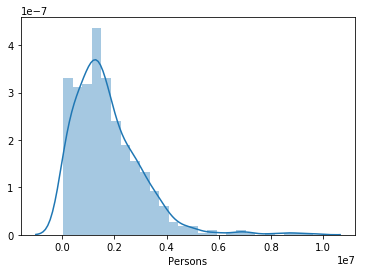

In [11]:
sns.distplot(data["Persons"]);

Persons Distribution is Skewed Positively

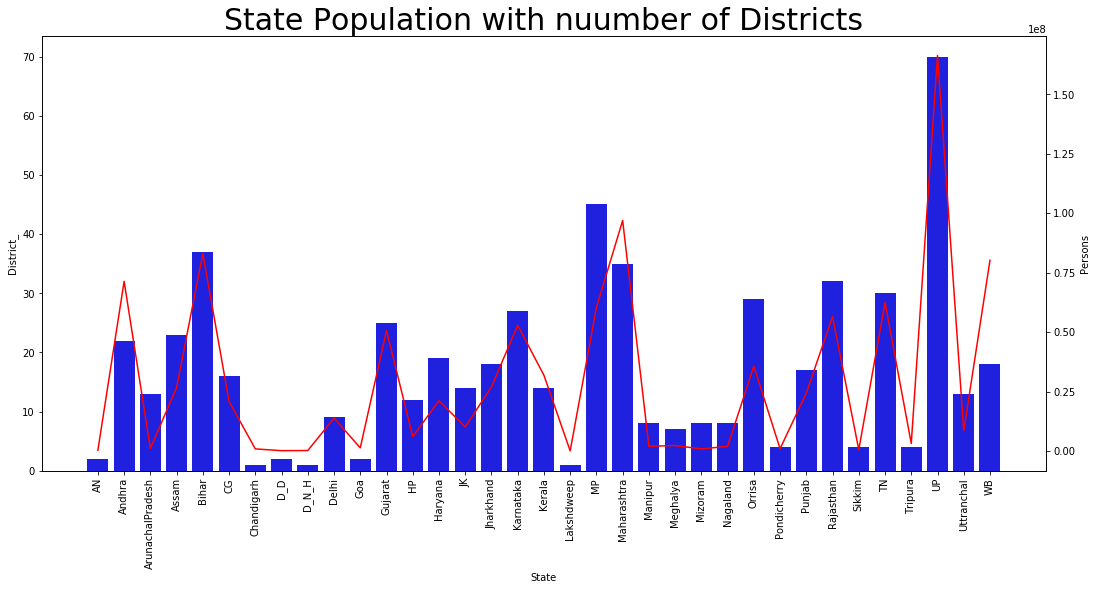

In [12]:
fig,ax1=plt.subplots(figsize=(18,8))
ax2 = ax1.twinx()

s=sns.barplot(x=State_populaition["State"],y=State_populaition["District_"],color="b",ax=ax1)
sns.lineplot(x=State_populaition["State"],y=State_populaition["Persons"],color="r",ax=ax2)
plt.setp(s.get_xticklabels(), rotation=90)
plt.title("State Population with nuumber of Districts",fontsize=30)

plt.show();

In [13]:
State_populaition.corr()["District_"]

District_   1.000
Persons     0.914
Name: District_, dtype: float64

State population is Highly Correlated to Number of Districts, Population is higher as state has more number of Districs

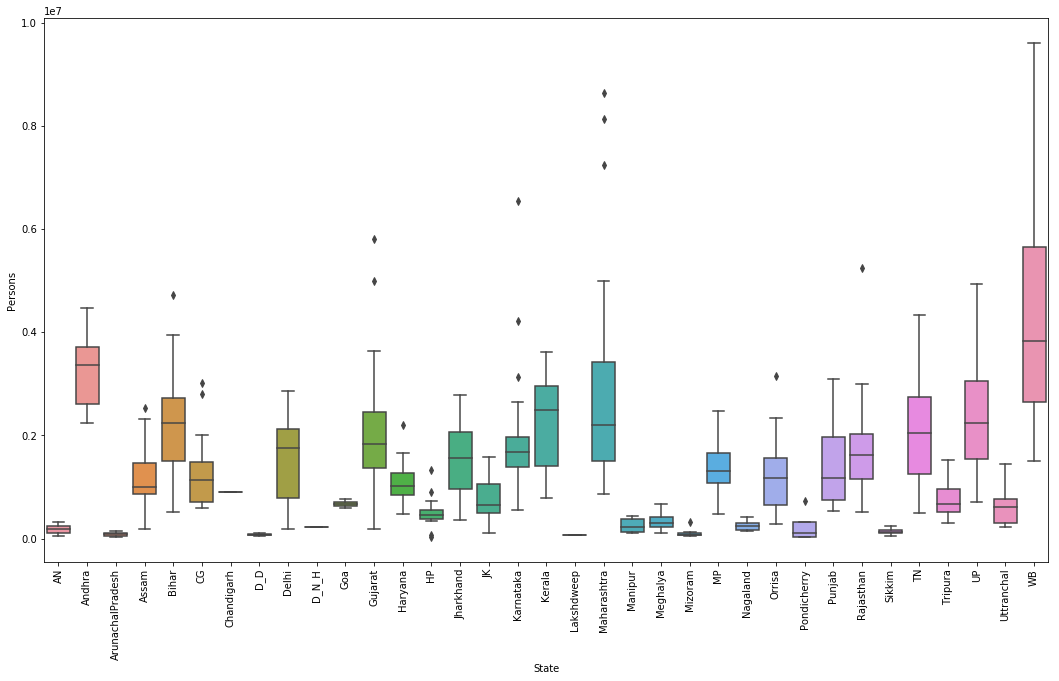

In [14]:
plt.figure(figsize=(18,10))
sns.boxplot(y=data["Persons"],x=data["State"]);
plt.xticks(rotation=90);

* UP has highesh Population and number of Districts  but the mean population is larger for West Bengal which has 18 Districts.
* There are few states where the District population differ significantly from observation and we can coonsider them high/low populated Districts

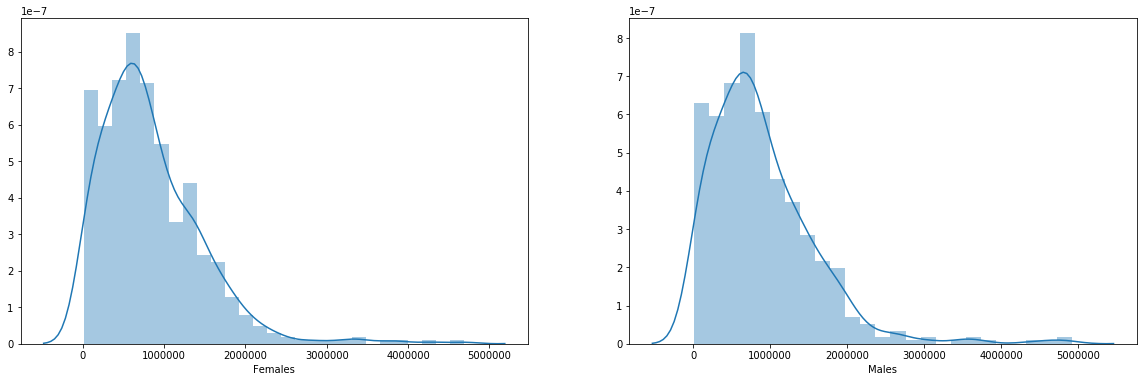

In [15]:

fig=plt.figure(figsize=(20,6))
axes =fig.subplots(1,2)

sns.distplot(data["Females"],ax=axes[0])
sns.distplot(data["Males"],ax=axes[1]);
plt.show()

Male and Female population follows a Similar Distribution Which is Skewed Positively

In [16]:
Gender_Population=data.groupby("State")["Males","Females"].sum()
Gender_Population=Gender_Population.stack().reset_index()
Gender_Population=Gender_Population.rename(columns={"level_1":"Gender",0:"Population"})


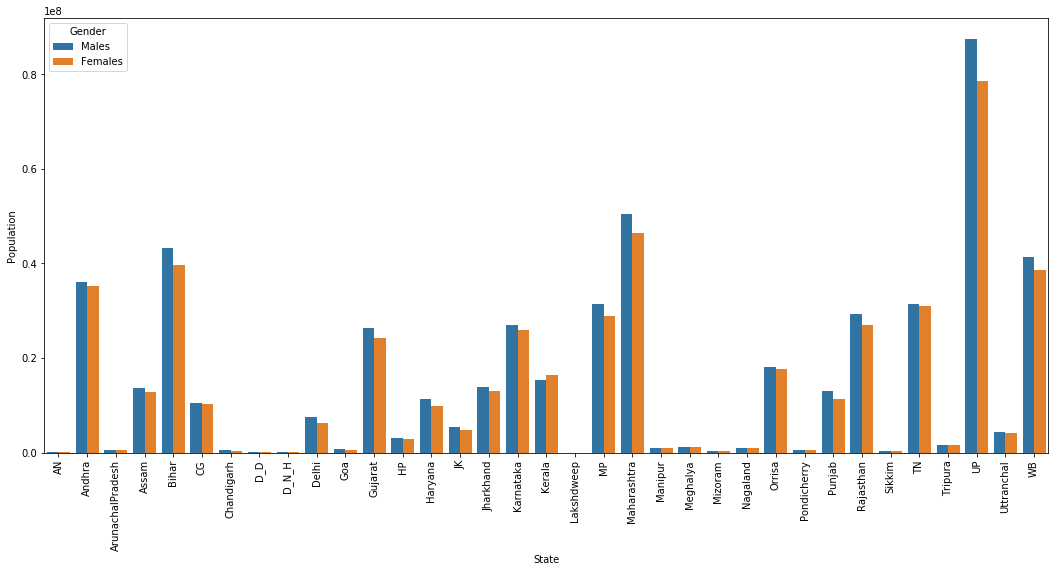

In [17]:
fig,ax1=plt.subplots(figsize=(18,8))
sns.barplot(x=Gender_Population["State"],y=Gender_Population["Population"],hue=Gender_Population["Gender"])
plt.xticks(rotation='vertical');

* Few states have  More number of males Population to Females and some states have almost same population of Males and Females
* Kerale has more female population than males



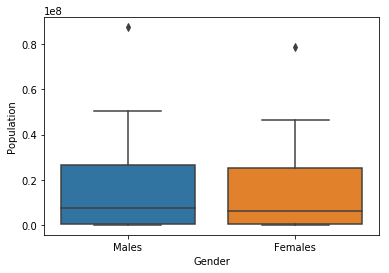

In [18]:
sns.boxplot("Gender","Population",data=Gender_Population);

Let perform a Statistical test  to check test if there is a significant difference between the Population of males and Females

#### Z-Test: whether mean of  Male and Females populatiion are statistically different
Null hypothesis: There is no Significant difference between Means of Male and Females populatiion

Alternative hypothesis: There is Significant difference between Meansof  Male and Females populatiion



In [19]:
ztest,pval=stests.ztest(x1=data["Males"],x2=data["Females"],value=0,alternative="two-sided")
prob=0.95
alpha=1-prob
if pval<alpha:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and there is Significant difference between Means of of Male and Females populatiion  with a probability of {}%".format((1-pval)*100))
else:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Failed to reject Null Hypothesis and there is no significant difference between Means of Male and Females populatiion at a significance level of {} and the Probability is {}%".format(alpha,(1-pval)*100))

Caluclated Statistic: 1.5572913747760424  

P-Value: 0.11940132230166942  

Significant Value: 0.050000000000000044  

Failed to reject Null Hypothesis and there is no significant difference between Means of Male and Females populatiion at a significance level of 0.050000000000000044 and the Probability is 88.05986776983306%


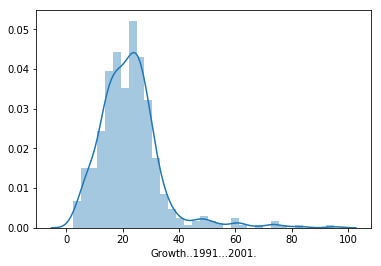

In [20]:
sns.distplot(data["Growth..1991...2001."].dropna());

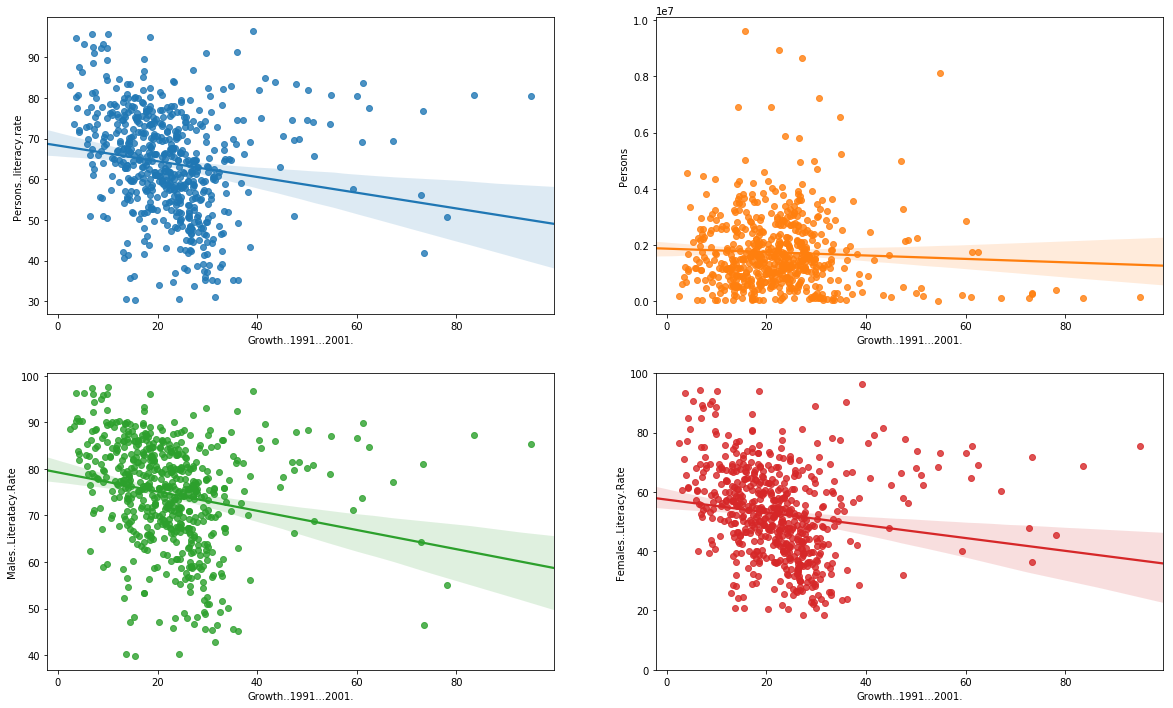

In [21]:

fig=plt.figure(figsize=(20,12))
axes =fig.subplots(2,2)
sns.regplot(data["Growth..1991...2001."],data['Persons..literacy.rate'],ax=axes[0,0])
sns.regplot(data["Growth..1991...2001."],data['Persons'],ax=axes[0,1])
sns.regplot(data["Growth..1991...2001."],data['Males..Literatacy.Rate'],ax=axes[1,0])
sns.regplot(data["Growth..1991...2001."],data['Females..Literacy.Rate'],ax=axes[1,1])
axes[1,1].set(ylim=(0, 100))
plt.show()



There is a Negative relationship between Growth rate 1991-2001 and Literacy Rate. As Growth rate is increasing,  Literact rate was decreasing

##### Distribution of Age Group

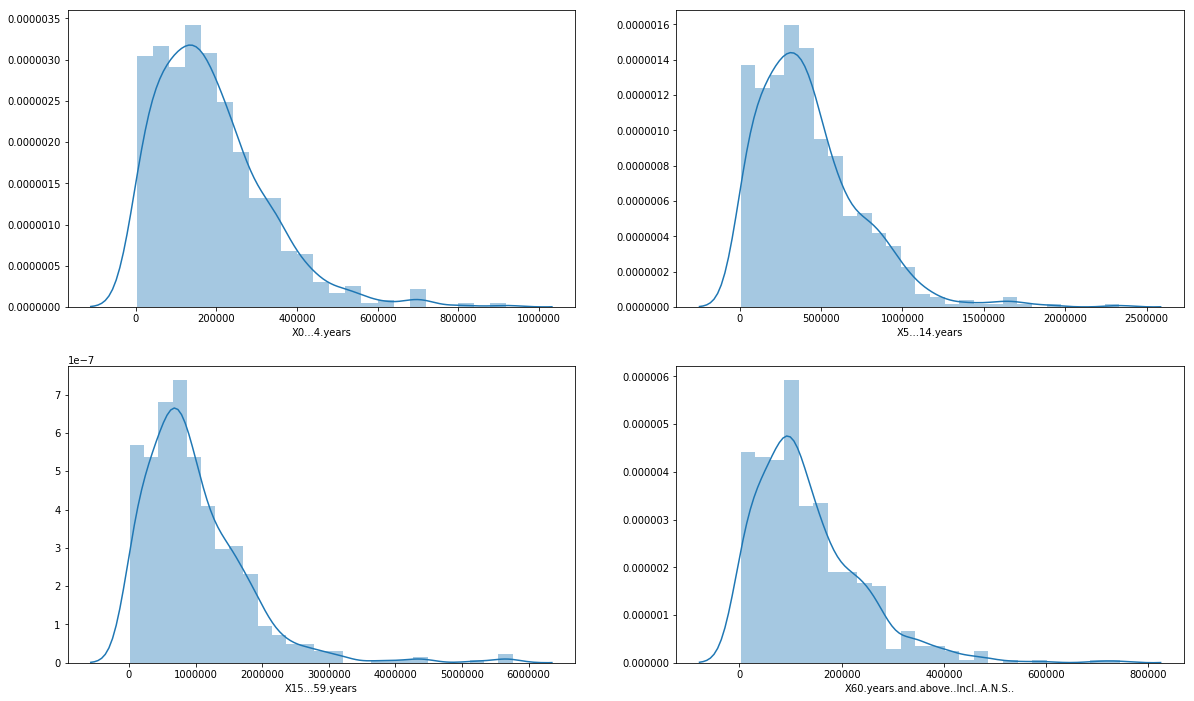

In [22]:
fig=plt.figure(figsize=(20,12))
axes =fig.subplots(2,2)
sns.distplot(data['X0...4.years'].dropna(),ax=axes[0,0])
sns.distplot(data['X5...14.years'].dropna(),ax=axes[0,1])
sns.distplot(data['X15...59.years'].dropna(),ax=axes[1,0])
sns.distplot(data['X60.years.and.above..Incl..A.N.S..'].dropna(),ax=axes[1,1])

plt.show()

In [23]:
age=data.groupby("State").agg({'X0...4.years':sum, 'X5...14.years':sum, 'X15...59.years':sum,'X60.years.and.above..Incl..A.N.S..':sum})
age=age.stack().reset_index()
age=age.rename(columns={"level_1":"Age Group",0:"Population"})


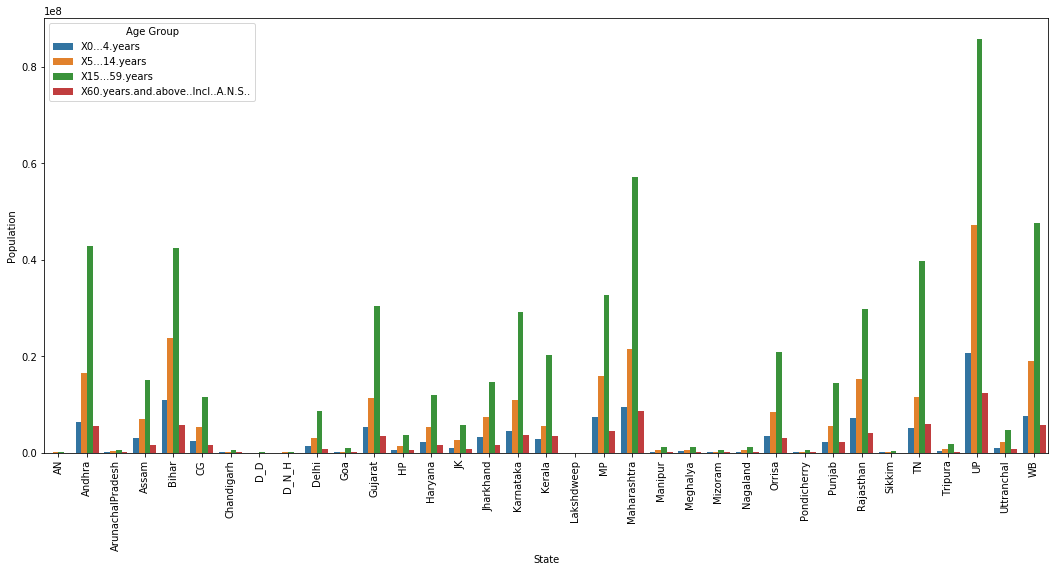

In [24]:
fig,ax1=plt.subplots(figsize=(18,8))
sns.barplot(x=age["State"],y=age["Population"],hue=age["Age Group"])
plt.xticks(rotation='vertical');

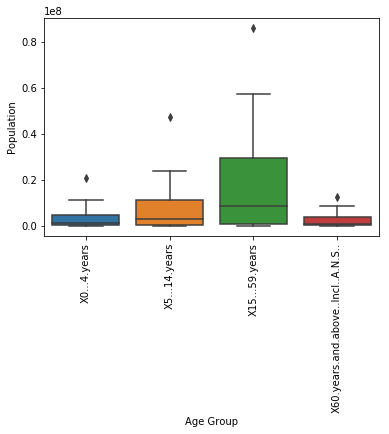

In [25]:
sns.boxplot(age["Age Group"],age["Population"]);
plt.xticks(rotation='vertical');

There is Significant Difference between Age Groups

#### House Holds

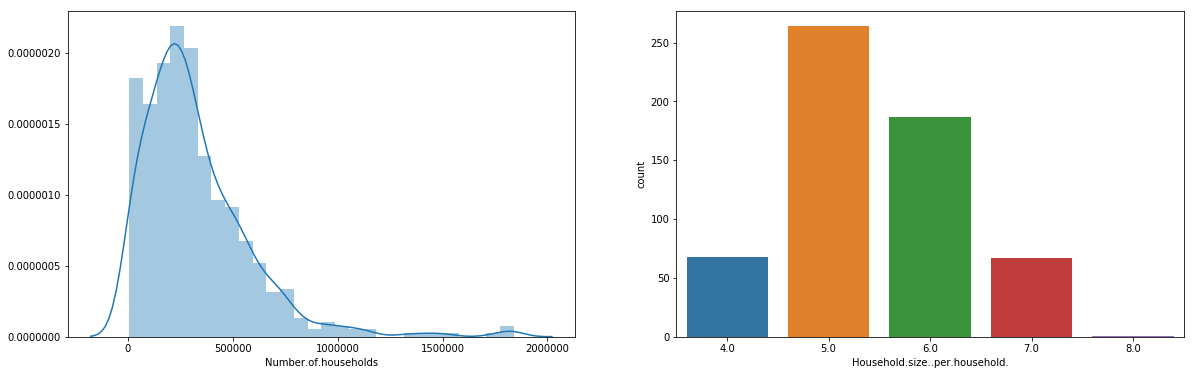

In [26]:
fig=plt.figure(figsize=(20,6))
axes =fig.subplots(1,2)

sns.distplot(data["Number.of.households"].dropna(),ax=axes[0])
sns.countplot(data["Household.size..per.household."],ax=axes[1]);
plt.show()

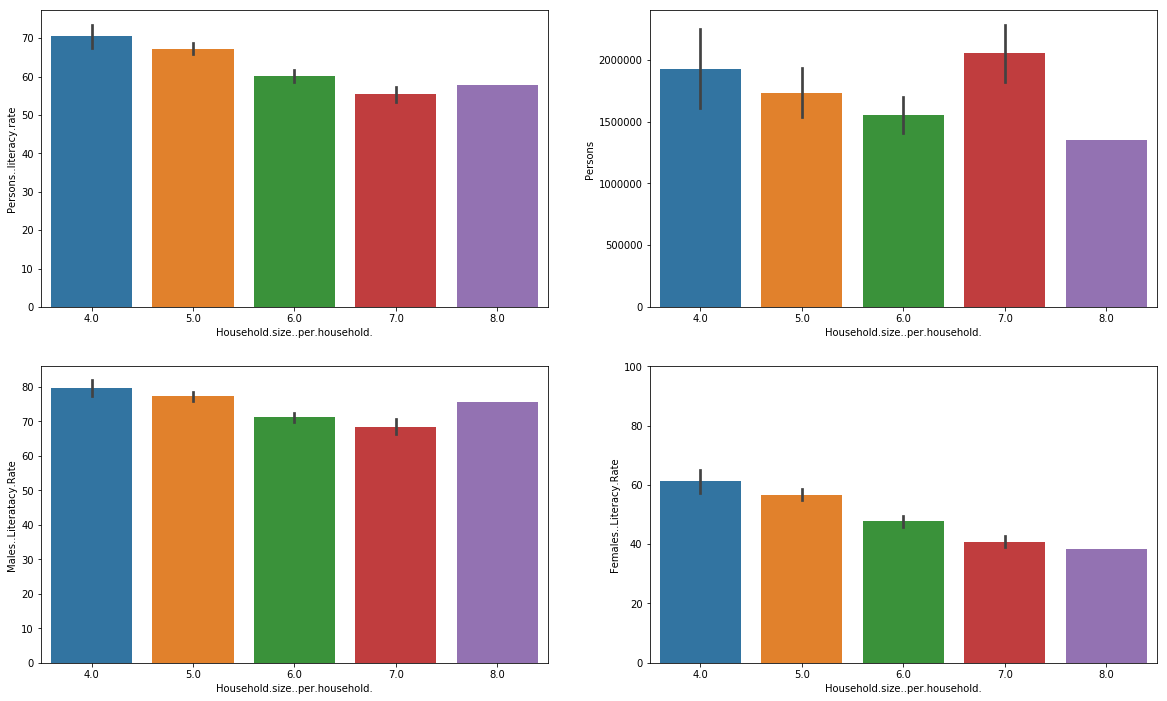

In [27]:

fig=plt.figure(figsize=(20,12))
axes =fig.subplots(2,2)
sns.barplot(data["Household.size..per.household."],data['Persons..literacy.rate'],ax=axes[0,0])
sns.barplot(data["Household.size..per.household."],data['Persons'],ax=axes[0,1])
sns.barplot(data["Household.size..per.household."],data['Males..Literatacy.Rate'],ax=axes[1,0])
sns.barplot(data["Household.size..per.household."],data['Females..Literacy.Rate'],ax=axes[1,1])
axes[1,1].set(ylim=(0, 100))
plt.show()



* Population Literacy rate is decreasing as the house hold size increases
* Female Literacy rate is decreasing as the house hold size increases
* Vusually, Male Literacy rate is showing Uniform distribution across household sizes
* House hold size of 4 and 7 are majorly contributors for population

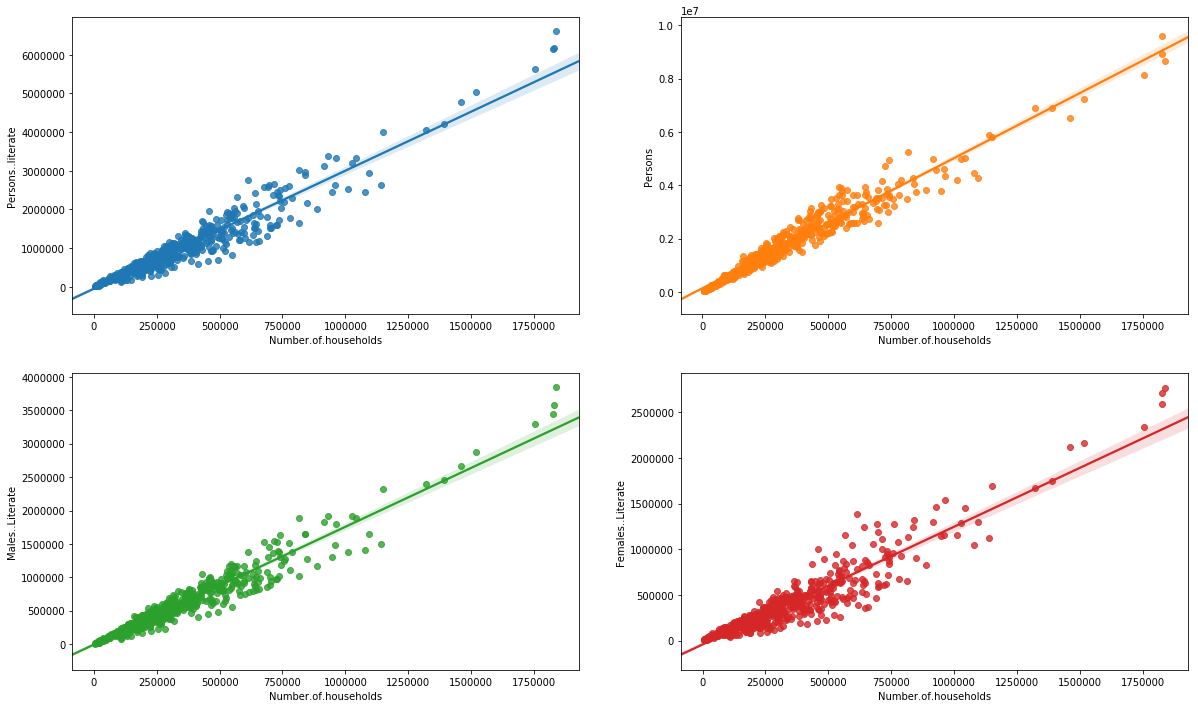

In [28]:
fig=plt.figure(figsize=(20,12))
axes =fig.subplots(2,2)
sns.regplot(data["Number.of.households"],data['Persons..literate'],ax=axes[0,0])
sns.regplot(data["Number.of.households"],data['Persons'],ax=axes[0,1])
sns.regplot(data["Number.of.households"],data["Males..Literate"],ax=axes[1,0])
sns.regplot(data["Number.of.households"],data['Females..Literate'],ax=axes[1,1])

plt.show()

* There is strong positive correlation beween Number of households and Literacy rate, as it is a known fact that as number of households increases then population also increases

In [29]:
sex_ratio=data.groupby("State")['Sex.ratio..females.per.1000.males.', 'Sex.ratio..0.6.years.'].mean()
sex_ratio=sex_ratio.reset_index()


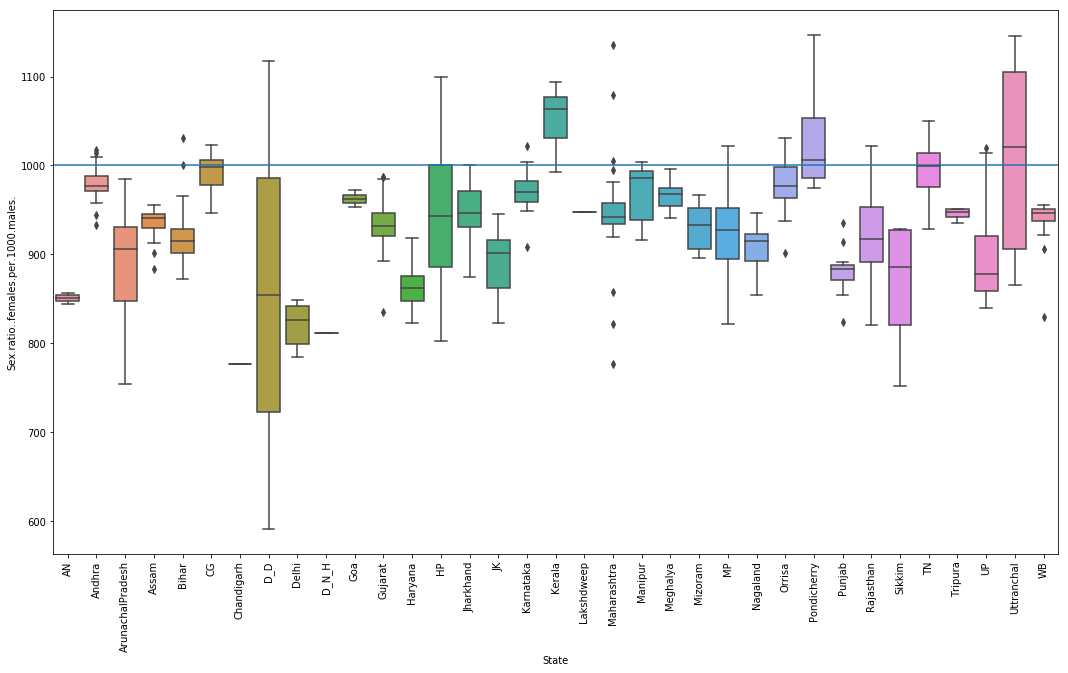

In [30]:
plt.figure(figsize=(18,10))
sns.boxplot(y=data["Sex.ratio..females.per.1000.males."],x=data["State"]);
plt.xticks(rotation=90);
plt.axhline(1000, xmin=0,xmax=1);


Blue Horizontal line is the refernce line for 1000 males, Kerale Orissa and Uttaranchal states have higher Mean ratio for females for 1000 males

#### Type of Education

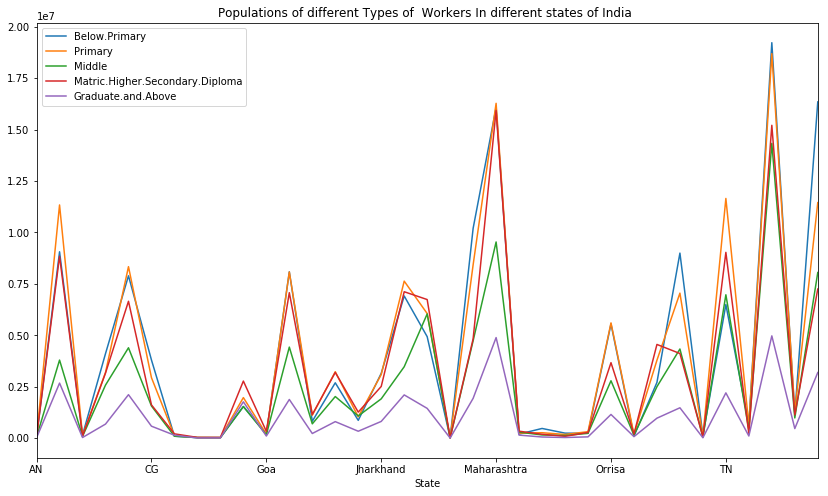

In [55]:
edu = data.groupby(["State"])[['Below.Primary', 'Primary', 'Middle', 'Matric.Higher.Secondary.Diploma','Graduate.and.Above']].sum()
edu.plot(kind="line", title="Populations of different Types of  Workers In different states of India ",figsize = (14, 8));

#### Populations of different Types of Workers In different states of India

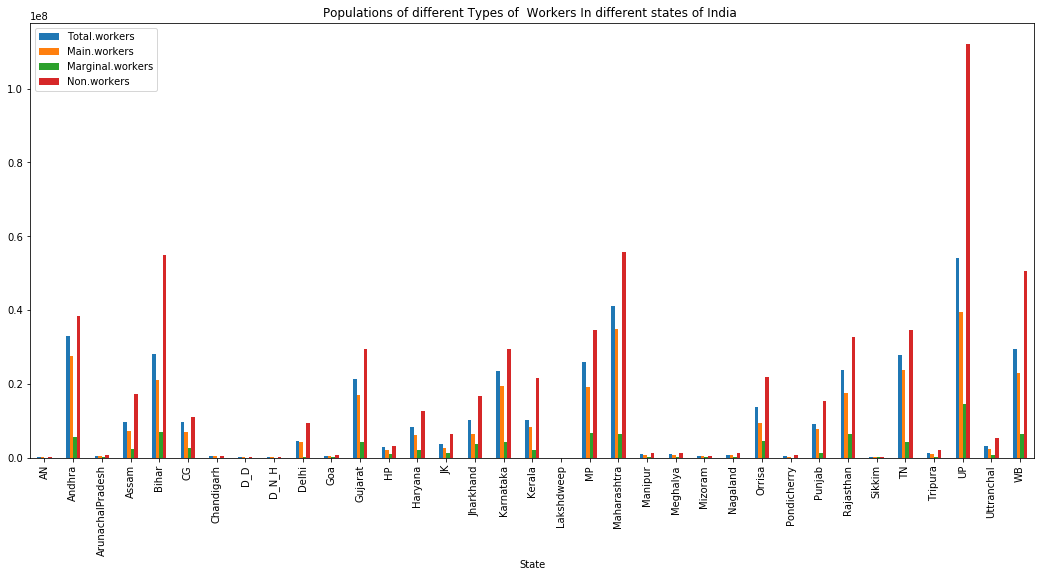

In [53]:
pop_work = data.groupby(["State"])[['Total.workers','Main.workers','Marginal.workers', 'Non.workers',]].sum()

pop_work.plot(kind="bar", title="Populations of different Types of  Workers In different states of India ",figsize = (18, 8));

#### Missing Vlues Check

In [33]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Missing Count', ' Missing Percent'])
    return missing_data

In [34]:
draw_missing_data_table(data)

,Missing Count,Missing Percent
Scheduled.Caste.population,576,0.976
Percentage...SC.to.total,575,0.975
Urban,531,0.900
Electricity..Agriculture.,346,0.586
Imp.Town.3.Name,142,0.241
College,142,0.241
Imp.Town.3.Population,108,0.183
Imp.Town.2.Name,97,0.164
Electricity..domestic.,93,0.158
SC.3.Name,66,0.112


let Remove variables which have more than 25% of Missing Values

In [35]:
data.drop(["Scheduled.Caste.population","Percentage...SC.to.total","Urban","Electricity..Agriculture."],axis=1,inplace=True)


#### Outlier Check

In [36]:
def Outlier_detection(train_data):
    numerical_columns=list(train_data.select_dtypes(np.number).columns)
    index=["Total Observations","Lower Limit","Upper Limit","IQR","Number of Outliers","No. of Not outlers"]
    out_df=pd.DataFrame(index=numerical_columns,columns=index)
    for col in numerical_columns:
        Q1,Q3=np.percentile(train_data[col],[25,75])
        IQR=Q3-Q1
        lower_limit=Q1-(1.5*IQR)
        upper_limit=Q3+(1.5*IQR)
        outlier=[]
        No_Outliers=[]
        for i in train_data[col]:
            if (i<lower_limit) | (i>upper_limit):
                outlier.append(i)
        new_df=pd.DataFrame({"Total Observations":len(train_data[col]),"Lower Limit":lower_limit,"Upper Limit":upper_limit,"IQR":IQR,"Number of Outliers":len(outlier),"No. of Not outlers":len(train_data[col])-len(outlier)},index=[col])
        out_df.update(new_df)
    return(out_df)

In [37]:
Outlier_detection(data)

,Total Observations,Lower Limit,Upper Limit,IQR,Number of Outliers,No. of Not outlers
Persons,590.000,-1562182.750,4770887.250,1583267.500,15.000,575.000
Males,590.000,-821523.750,2491208.250,828183.000,17.000,573.000
Females,590.000,-741810.000,2273800.000,753902.500,14.000,576.000
Growth..1991...2001.,590.000,NaN,NaN,NaN,0.000,590.000
Rural,590.000,NaN,NaN,NaN,0.000,590.000
Number.of.households,590.000,NaN,NaN,NaN,0.000,590.000
Household.size..per.household.,590.000,NaN,NaN,NaN,0.000,590.000
Sex.ratio..females.per.1000.males.,590.000,NaN,NaN,NaN,0.000,590.000
Sex.ratio..0.6.years.,590.000,NaN,NaN,NaN,0.000,590.000
Scheduled.Tribe.population,590.000,NaN,NaN,NaN,0.000,590.000


In [38]:
data.corr()

,Persons,Males,Females,Growth..1991...2001.,Rural,Number.of.households,Household.size..per.household.,Sex.ratio..females.per.1000.males.,Sex.ratio..0.6.years.,Scheduled.Tribe.population,Percentage.to.total.population..ST.,Persons..literate,Males..Literate,Females..Literate,Persons..literacy.rate,Males..Literatacy.Rate,Females..Literacy.Rate,Total.Educated,Data.without.level,Below.Primary,Primary,Middle,Matric.Higher.Secondary.Diploma,Graduate.and.Above,X0...4.years,X5...14.years,X15...59.years,X60.years.and.above..Incl..A.N.S..,Total.workers,Main.workers,Marginal.workers,Non.workers,SC.1.Population,SC.2.Population,SC.3.Population,Religeon.1.Population,Religeon.2.Population,Religeon.3.Population,ST.1.Population,ST.2.Population,ST.3.Population,Imp.Town.1.Population,Imp.Town.2.Population,Imp.Town.3.Population,Total.Inhabited.Villages,Drinking.water.facilities,Safe.Drinking.water,Electricity..Power.Supply.,Electricity..domestic.,Primary.school,Middle.schools,Secondary.Sr.Secondary.schools,College,Medical.facility,Primary.Health.Centre,Primary.Health.Sub.Centre,Post..telegraph.and.telephone.facility,Bus.services,Paved.approach.road,Mud.approach.road,Permanent.House,Semi.permanent.House,Temporary.House
Persons,1.000,0.999,0.999,-0.051,0.878,0.975,-0.007,-0.016,-0.062,0.125,-0.436,0.949,0.968,0.908,0.046,0.049,0.041,0.949,0.440,0.909,0.943,0.886,0.837,0.760,0.951,0.968,0.990,0.954,0.964,0.950,0.740,0.987,0.658,0.658,0.646,0.975,0.703,0.430,0.047,0.107,0.156,0.533,0.463,0.556,0.491,0.492,0.505,0.503,0.368,0.585,0.524,0.543,0.423,0.701,0.561,0.540,0.552,0.455,0.678,0.390,0.231,-0.162,-0.106
Males,0.999,1.000,0.995,-0.032,0.869,0.971,0.009,-0.050,-0.081,0.122,-0.434,0.947,0.969,0.905,0.043,0.045,0.037,0.947,0.434,0.904,0.938,0.884,0.840,0.772,0.952,0.968,0.989,0.946,0.960,0.948,0.728,0.988,0.654,0.656,0.646,0.973,0.706,0.422,0.043,0.105,0.156,0.546,0.476,0.565,0.485,0.486,0.498,0.495,0.359,0.579,0.516,0.531,0.416,0.693,0.546,0.528,0.546,0.445,0.673,0.383,0.239,-0.170,-0.107
Females,0.999,0.995,1.000,-0.072,0.885,0.977,-0.023,0.021,-0.041,0.128,-0.436,0.948,0.965,0.910,0.050,0.054,0.046,0.948,0.444,0.913,0.947,0.886,0.831,0.746,0.948,0.965,0.989,0.960,0.967,0.950,0.752,0.984,0.660,0.658,0.644,0.976,0.698,0.437,0.051,0.108,0.155,0.518,0.448,0.545,0.497,0.498,0.510,0.510,0.377,0.590,0.532,0.554,0.430,0.708,0.576,0.552,0.558,0.465,0.681,0.396,0.222,-0.153,-0.104
Growth..1991...2001.,-0.051,-0.032,-0.072,1.000,-0.138,-0.115,0.359,-0.510,-0.080,0.063,0.294,-0.098,-0.071,-0.133,-0.169,-0.206,-0.157,-0.099,-0.090,-0.099,-0.150,-0.111,-0.064,0.053,0.045,0.018,-0.079,-0.178,-0.111,-0.098,-0.128,-0.014,-0.035,-0.008,0.020,-0.055,-0.005,-0.141,0.087,0.149,0.076,0.077,0.240,0.244,-0.127,-0.127,-0.130,-0.188,-0.171,-0.157,-0.249,-0.305,-0.138,-0.188,-0.253,-0.243,-0.235,-0.254,-0.157,-0.087,-0.026,0.005,0.026
Rural,0.878,0.869,0.885,-0.138,1.000,0.817,0.092,0.109,0.029,0.103,-0.441,0.738,0.773,0.679,-0.175,-0.142,-0.187,0.738,0.347,0.832,0.772,0.688,0.539,0.413,0.906,0.916,0.829,0.854,0.846,0.782,0.863,0.865,0.667,0.636,0.614,0.859,0.642,0.226,0.056,0.069,0.103,0.180,0.189,0.246,0.633,0.633,0.648,0.576,0.487,0.701,0.570,0.566,0.488,0.748,0.571,0.548,0.594,0.434,0.738,0.555,0.044,-0.066,0.018
Number.of.households,0.975,0.971,0.977,-0.115,0.817,1.000,-0.181,0.049,-0.019,0.159,-0.398,0.963,0.969,0.941,0.123,0.111,0.129,0.963,0.455,0.897,0.967,0.886,0.868,0.780,0.875,0.899,0.990,0.948,0.973,0.975,0.686,0.943,0.612,0.637,0.602,0.954,0.653,0.496,0.067,0.141,0.191,0.540,0.498,0.607,0.431,0.432,0.442,0.469,0.352,0.538,0.517,0.577,0.375,0.699,0.597,0.601,0.540,0.508,0.626,0.325,0.219,-0.160,-0.093
Household.size..per.household.,-0.007,0.009,-0.023,0.359,0.092,-0.181,1.000,-0.345,-0.224,-0.144,-0.074,-0.133,-0.085,-0.194,-0.368,-0.322,-0.403,-0.133,-0.086,-0.068,-0.172,-0.086,-0.156,-0.108,0.165,0.146,-0.086,-0.089,-0.123,-0.167,0.081,0.063,0.088,0.014,0.091,-0.011,0.080,-0.279,-0.077,-0.130,-0.153,-0.054,-0.116,-0.159,0.094,0.092,0.096,0.008,-0.016,0.048,-0.0